### Data Shifting Experiment

### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

In [1]:
%cd ..

/home/datascience/Data Fusion


In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings, plot_results, update_column_names

In [3]:
PATH = 'Embeddings/mimic/'
FILE = 'embeddings.csv'
DATASET = 'mimic'

batch_size = 32

output_size = 4
multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.disease_label = df.disease_label.astype(str)
df.head()

path  race_label  sex_label  \
0  p19/p19702416/s51321189/d85c9f15-f0f84927-761f...           0          0   
1  p13/p13339704/s51292704/0024603b-12db30e2-ab32...           2          0   
2  p13/p13339704/s51292704/7953848d-2411f0df-859f...           2          0   
3  p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...           0          0   
4  p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...           0          0   

  disease_label  subject_id  study_id  split  \
0             3    19702416  51321189  train   
1             3    13339704  51292704  train   
2             3    13339704  51292704  train   
3             3    12668169  54048859  train   
4             3    10309415  58144222  train   

                                          file_path    text_1    text_2  ...  \
0  datasets/mimic/files/p19/p19702416/s51321189.txt  0.019312 -0.016845  ...   
1  datasets/mimic/files/p13/p13339704/s51292704.txt  0.012198 -0.027218  ...   
2  datasets/mimic/files/p13/p13339704/s51292704.txt  0.012198 -0.027218  ...   
3  datasets/mimic/files/p12/p12668169/s54048859.txt  0.023151 -0.003735  ...   
4  datasets/mimic/files/p10/p10309415/s58144222.txt  0.022132 -0.021821  ...   

   image_758  image_759  image_760  image_761  image_762  image_763  \
0  -1.977094   0.664772  -2.003561   0.063048   0.218469  -2.259382   
1  -2.502330  -0.262871  -2.777717   1.082299   1.273291  -1.900938   
2  -2.352660   0.049591  -2.599992   0.709397   0.635155  -2.035155   
3  -2.531913   0.778623  -3.406011   0.288661   1.660015  -2.785958   
4  -1.868888   0.562119  -1.824777   0.069089   1.093687  -1.628035   

   image_764  image_765  image_766  image_767  
0  -1.804749  -3.272988   1.671752  -2.163086  
1  -1.250531  -3.238538   1.466622  -3.243235  
2  -1.170720  -3.293882   1.306690  -2.955477  
3  -1.350666  -2.999661   2.809513  -3.075176  
4  -1.373444  -3.014874   1.524349  -2.403681  

[5 rows x 4872 columns]

In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = 'disease_label'

### Run Experiments

##################################################  Shift -1  ##################################################


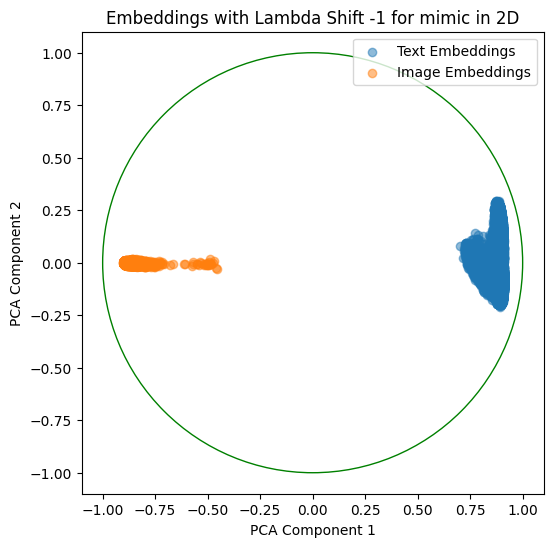

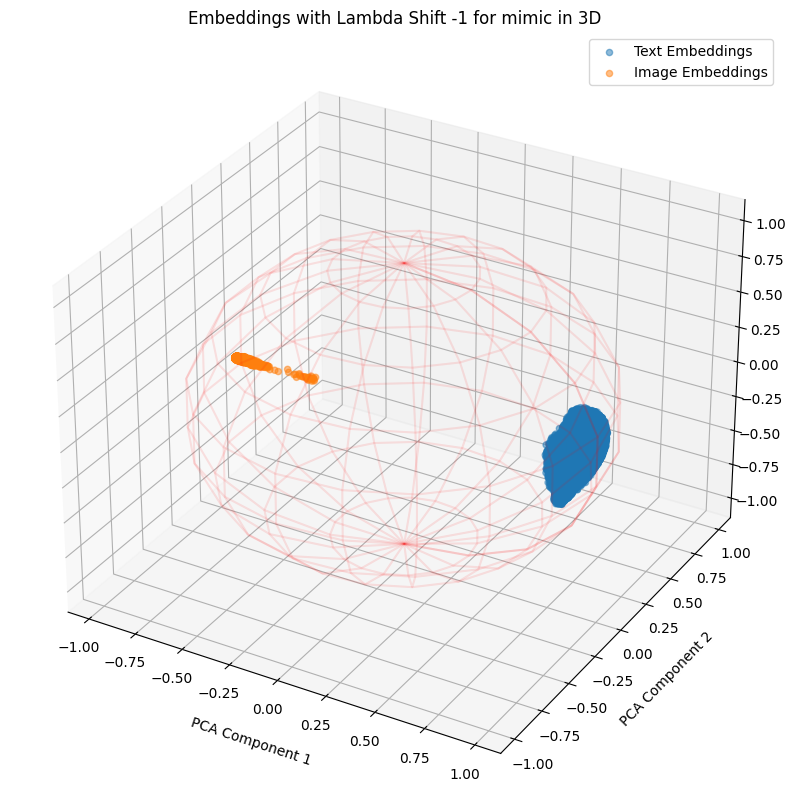

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.23 seconds
Total Training Time per Epoch: 1061.50 seconds
Average Inference Time per Epoch: 2.75 seconds
Total Inference Time per Epoch: 137.71 seconds


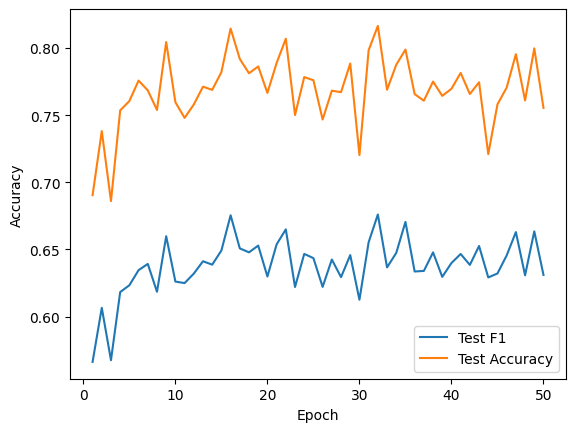

Best Accuracy: {'Acc': 0.8165349143610013, 'F1': 0.6760405451038326, 'Epoch': 32}
Best Macro-F1: {'Acc': 0.8165349143610013, 'F1': 0.6760405451038326, 'Epoch': 32}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.28 seconds
Total Training Time per Epoch: 863.85 seconds
Average Inference Time per Epoch: 2.56 seconds
Total Inference Time per Epoch: 127.82 seconds


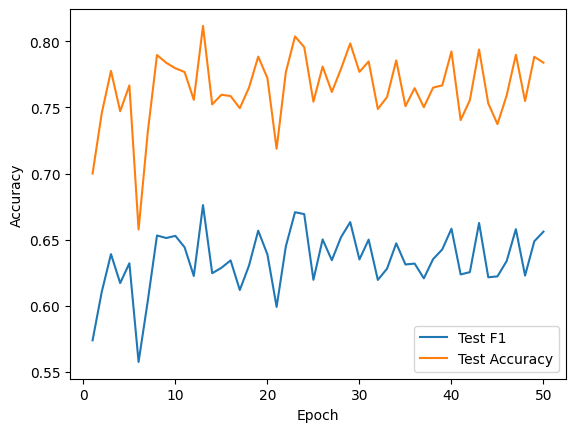

Best Accuracy: {'Acc': 0.8116600790513834, 'F1': 0.6761064412481714, 'Epoch': 13}
Best Macro-F1: {'Acc': 0.8116600790513834, 'F1': 0.6761064412481714, 'Epoch': 13}
##################################################  Shift -0.8  ##################################################


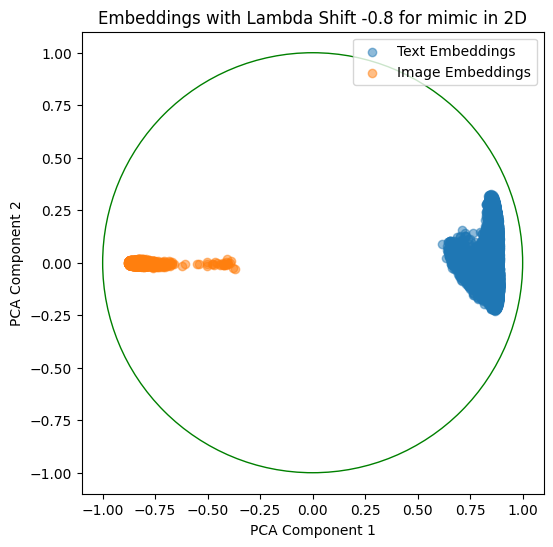

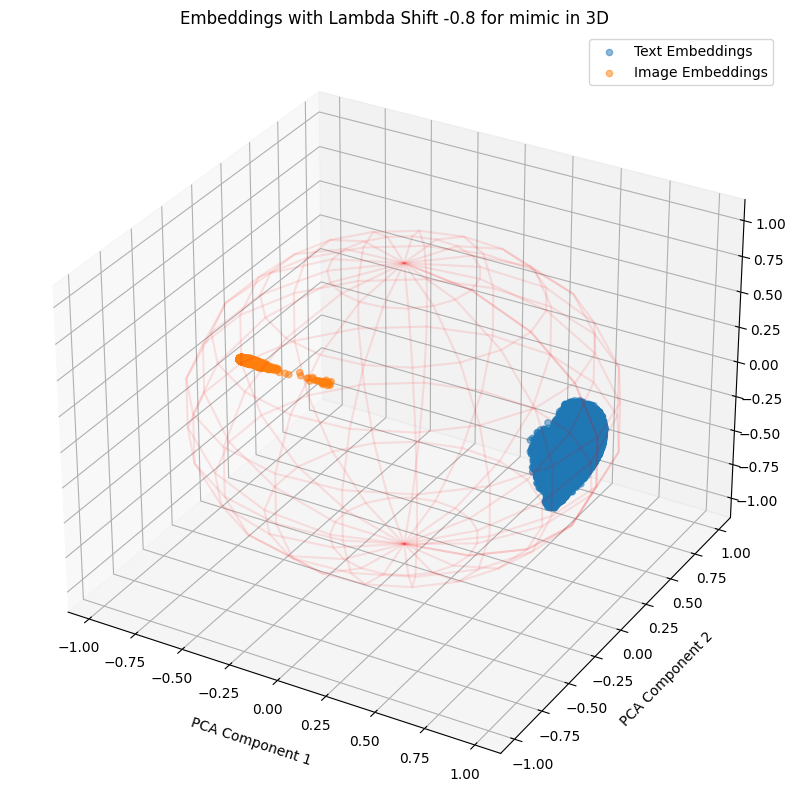

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.25 seconds
Total Training Time per Epoch: 1062.31 seconds
Average Inference Time per Epoch: 3.25 seconds
Total Inference Time per Epoch: 162.47 seconds


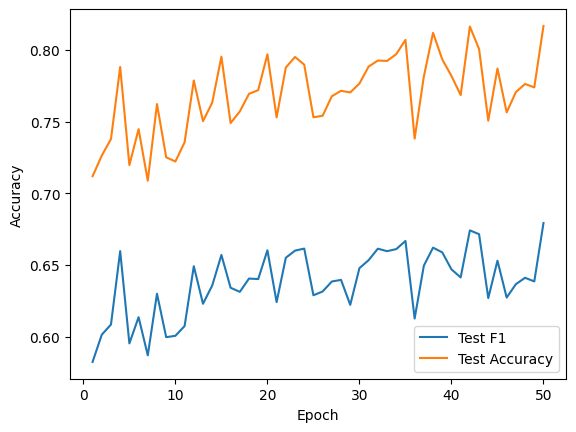

Best Accuracy: {'Acc': 0.8167325428194994, 'F1': 0.6792757095049626, 'Epoch': 50}
Best Macro-F1: {'Acc': 0.8167325428194994, 'F1': 0.6792757095049626, 'Epoch': 50}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 19.83 seconds
Total Training Time per Epoch: 991.70 seconds
Average Inference Time per Epoch: 3.36 seconds
Total Inference Time per Epoch: 168.23 seconds


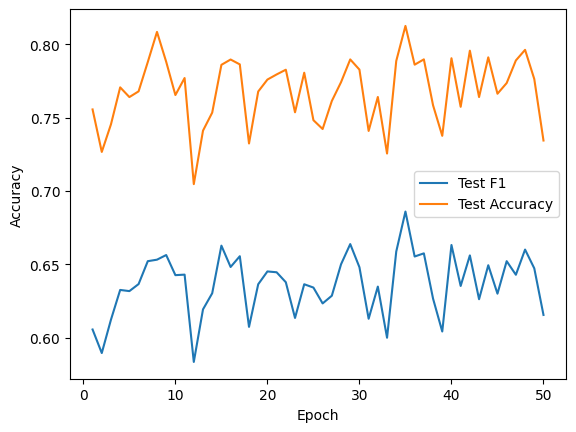

Best Accuracy: {'Acc': 0.8125494071146245, 'F1': 0.68604730476097, 'Epoch': 35}
Best Macro-F1: {'Acc': 0.8125494071146245, 'F1': 0.68604730476097, 'Epoch': 35}
##################################################  Shift -0.6  ##################################################


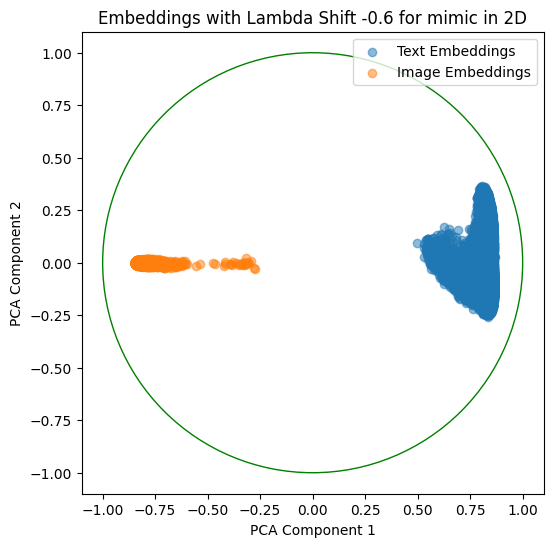

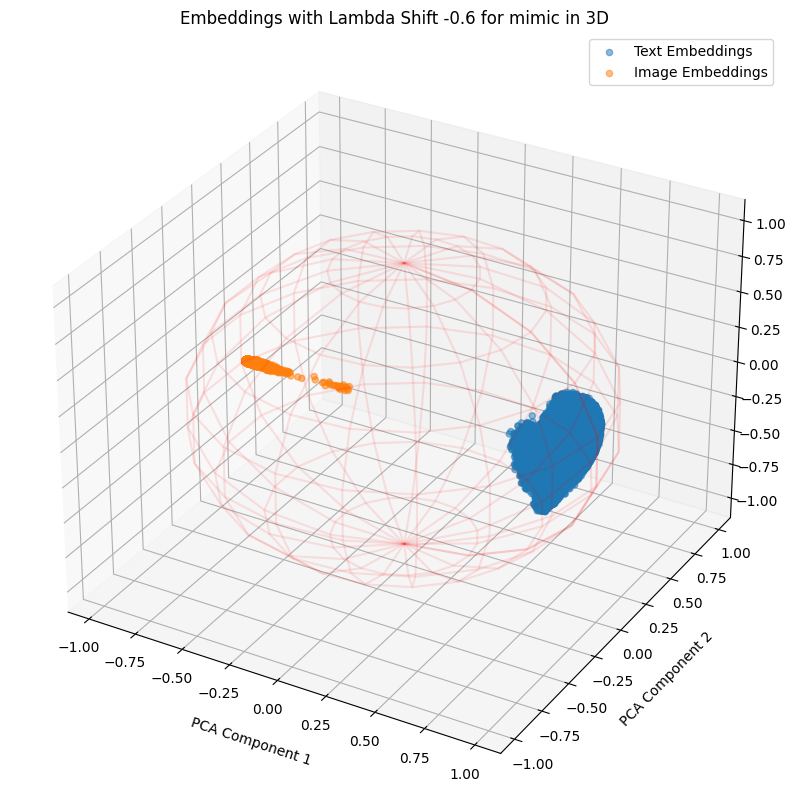

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.24 seconds
Total Training Time per Epoch: 1061.76 seconds
Average Inference Time per Epoch: 3.27 seconds
Total Inference Time per Epoch: 163.67 seconds


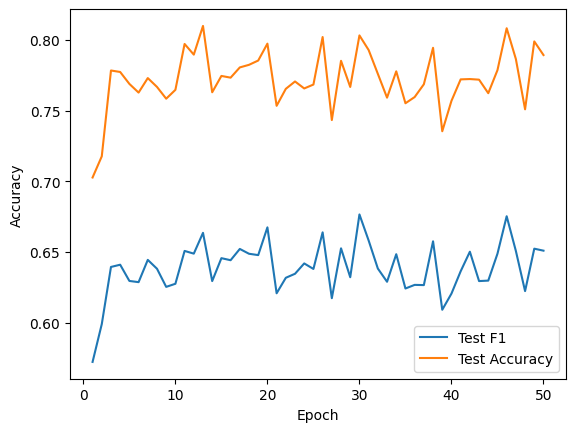

Best Accuracy: {'Acc': 0.8099802371541502, 'F1': 0.6634927173200527, 'Epoch': 13}
Best Macro-F1: {'Acc': 0.8032608695652174, 'F1': 0.6765161184013286, 'Epoch': 30}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.38 seconds
Total Training Time per Epoch: 918.91 seconds
Average Inference Time per Epoch: 3.27 seconds
Total Inference Time per Epoch: 163.28 seconds


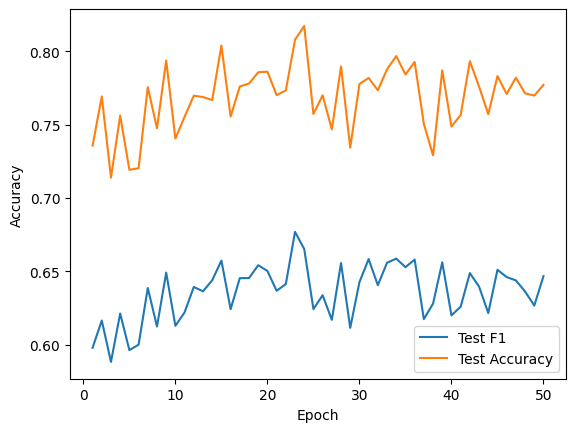

Best Accuracy: {'Acc': 0.8173583662714098, 'F1': 0.6652419075585105, 'Epoch': 24}
Best Macro-F1: {'Acc': 0.8079380764163373, 'F1': 0.676950161017029, 'Epoch': 23}
##################################################  Shift -0.4  ##################################################


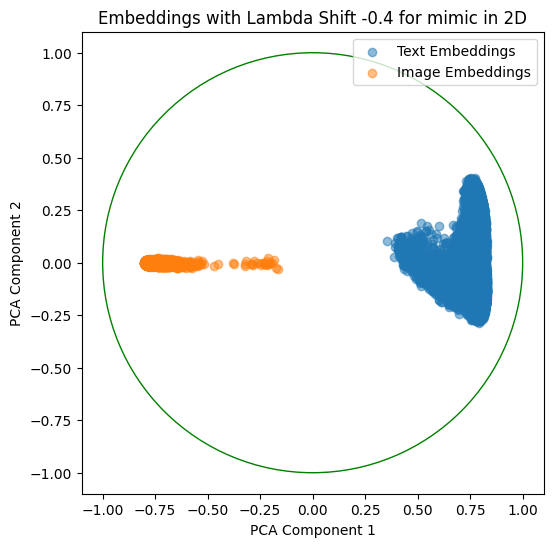

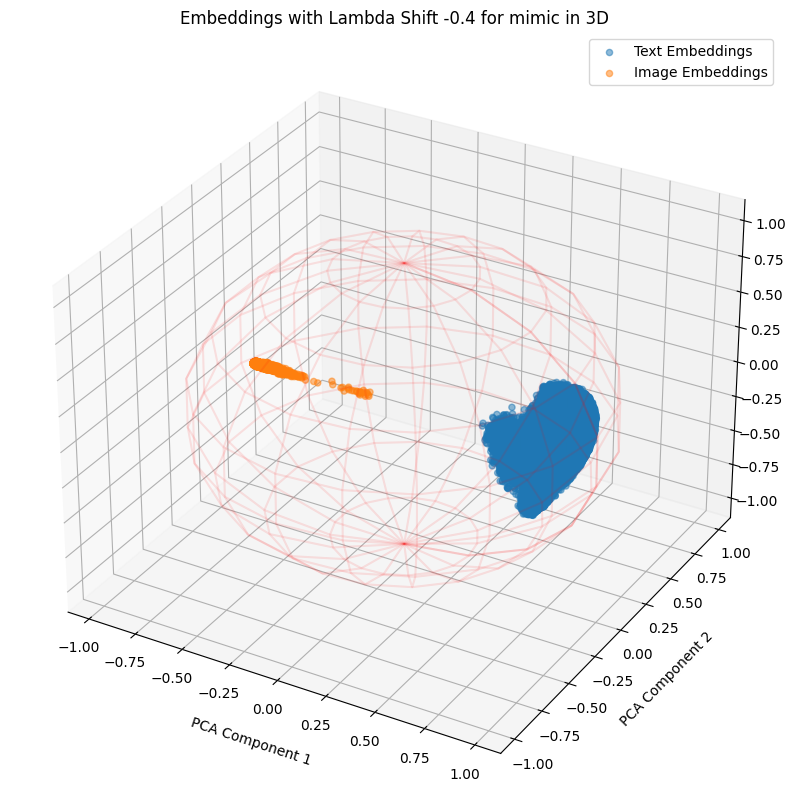

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.98 seconds
Total Training Time per Epoch: 1048.79 seconds
Average Inference Time per Epoch: 3.29 seconds
Total Inference Time per Epoch: 164.28 seconds


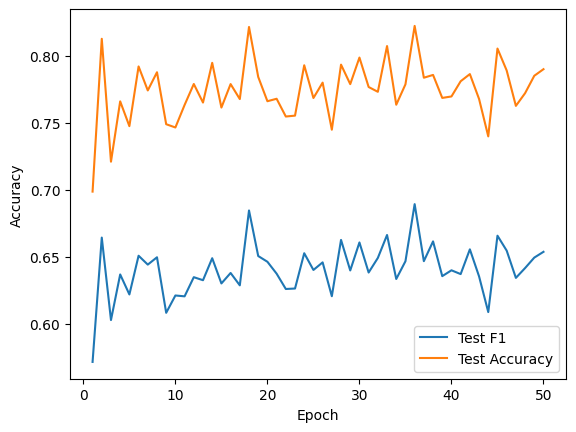

Best Accuracy: {'Acc': 0.822068511198946, 'F1': 0.6892360378454094, 'Epoch': 36}
Best Macro-F1: {'Acc': 0.822068511198946, 'F1': 0.6892360378454094, 'Epoch': 36}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.26 seconds
Total Training Time per Epoch: 913.04 seconds
Average Inference Time per Epoch: 3.28 seconds
Total Inference Time per Epoch: 163.94 seconds


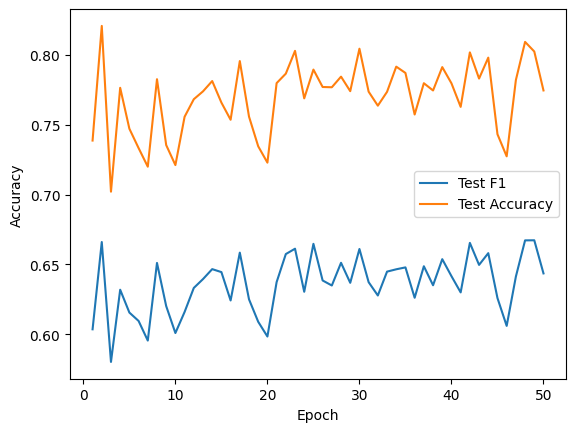

Best Accuracy: {'Acc': 0.8206851119894598, 'F1': 0.6660091547403576, 'Epoch': 2}
Best Macro-F1: {'Acc': 0.8023715415019763, 'F1': 0.6672562654882221, 'Epoch': 49}
##################################################  Shift -0.2  ##################################################


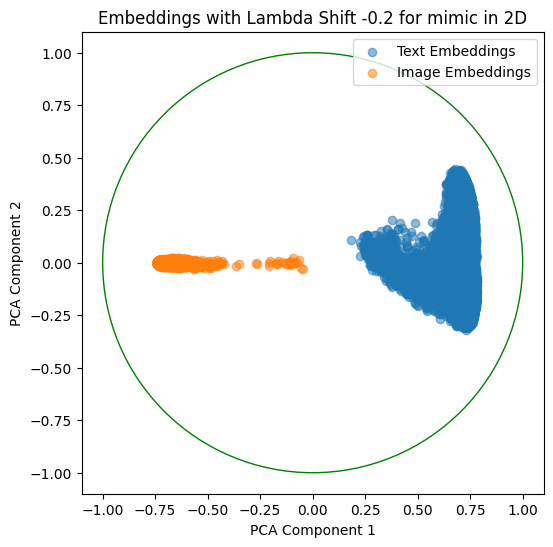

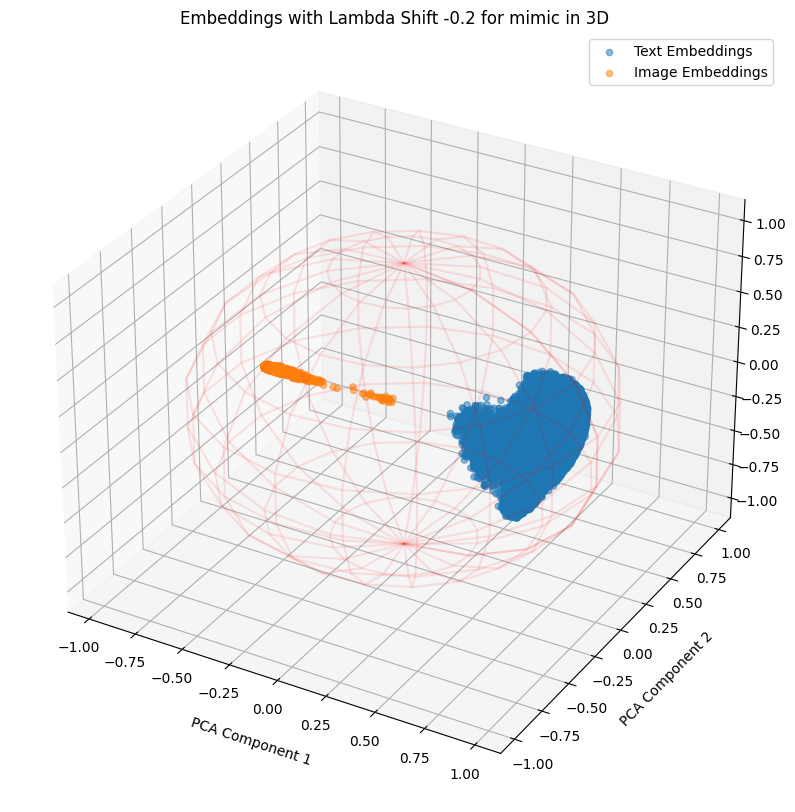

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 22.49 seconds
Total Training Time per Epoch: 1124.35 seconds
Average Inference Time per Epoch: 3.41 seconds
Total Inference Time per Epoch: 170.59 seconds


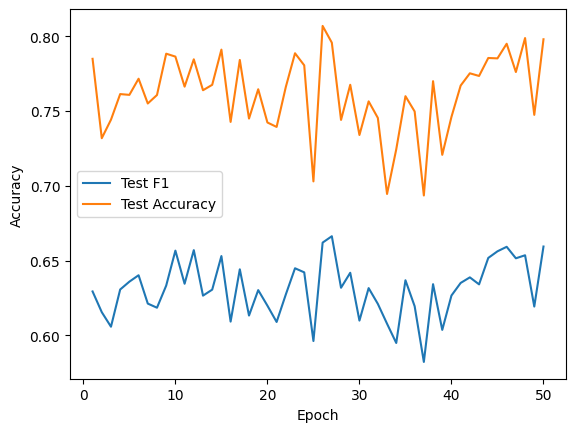

Best Accuracy: {'Acc': 0.8069499341238472, 'F1': 0.6620199672780047, 'Epoch': 26}
Best Macro-F1: {'Acc': 0.7957509881422925, 'F1': 0.666288197511734, 'Epoch': 27}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.73 seconds
Total Training Time per Epoch: 936.29 seconds
Average Inference Time per Epoch: 3.36 seconds
Total Inference Time per Epoch: 168.04 seconds


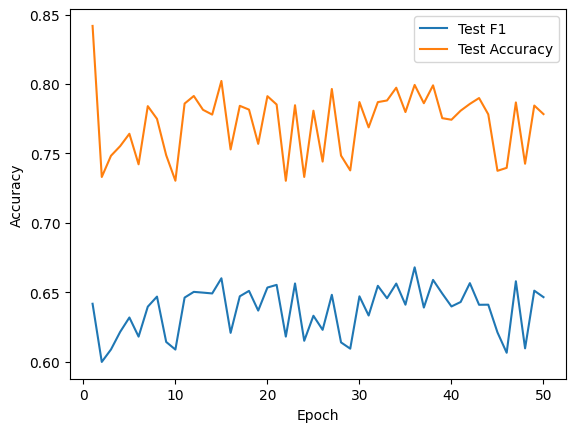

Best Accuracy: {'Acc': 0.8418313570487483, 'F1': 0.6417365573543463, 'Epoch': 1}
Best Macro-F1: {'Acc': 0.7993412384716733, 'F1': 0.6679756575549366, 'Epoch': 36}
##################################################  Shift 0  ##################################################


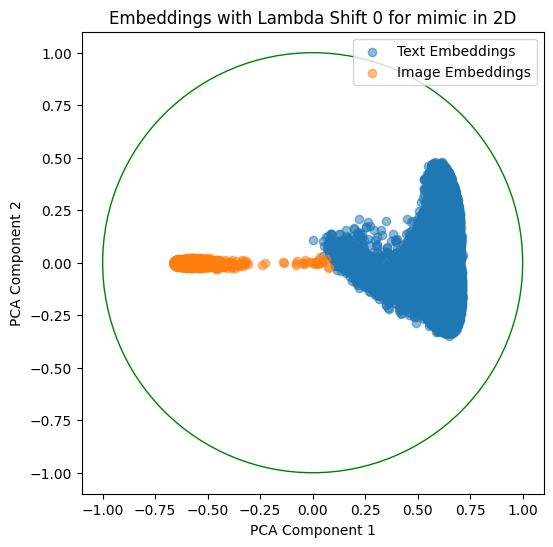

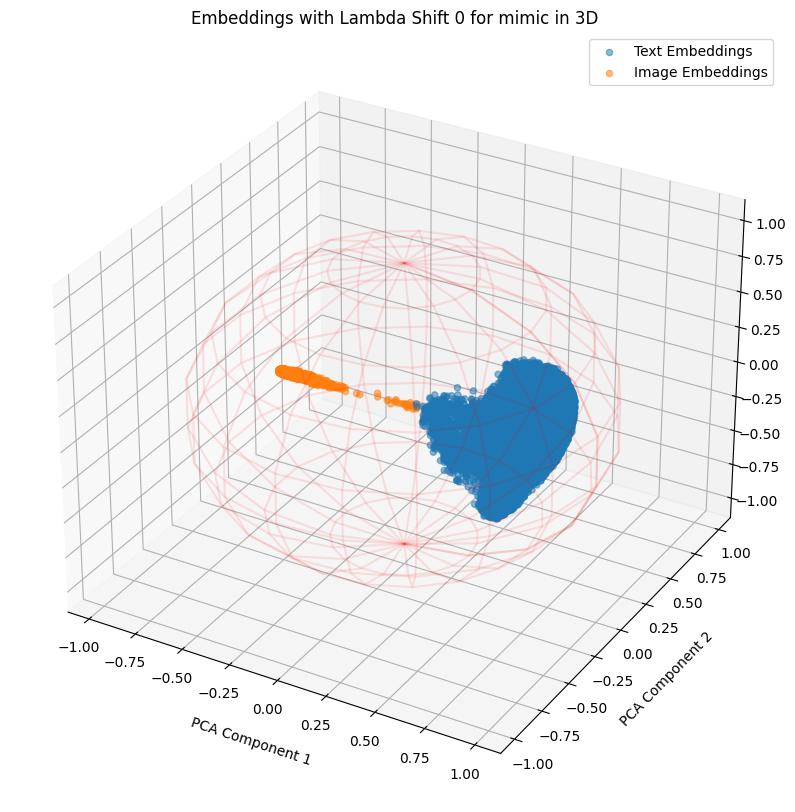

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.41 seconds
Total Training Time per Epoch: 1070.37 seconds
Average Inference Time per Epoch: 3.31 seconds
Total Inference Time per Epoch: 165.30 seconds


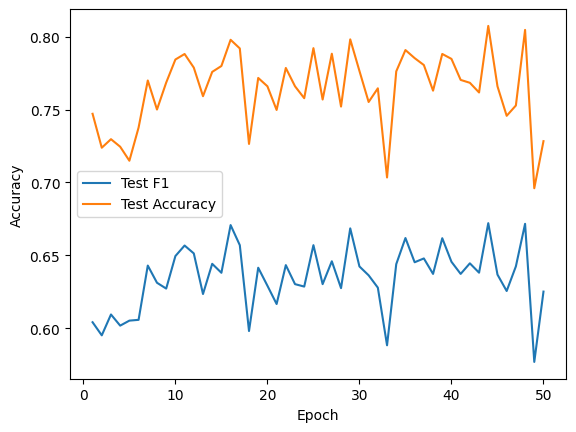

Best Accuracy: {'Acc': 0.8074440052700922, 'F1': 0.6720911616758947, 'Epoch': 44}
Best Macro-F1: {'Acc': 0.8074440052700922, 'F1': 0.6720911616758947, 'Epoch': 44}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.54 seconds
Total Training Time per Epoch: 876.79 seconds
Average Inference Time per Epoch: 3.34 seconds
Total Inference Time per Epoch: 166.80 seconds


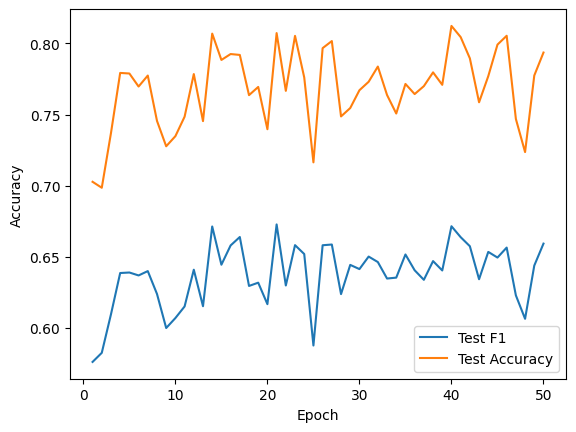

Best Accuracy: {'Acc': 0.8123188405797102, 'F1': 0.6715426431339425, 'Epoch': 40}
Best Macro-F1: {'Acc': 0.8072793148880105, 'F1': 0.6728116029773485, 'Epoch': 21}
##################################################  Shift 0.2  ##################################################


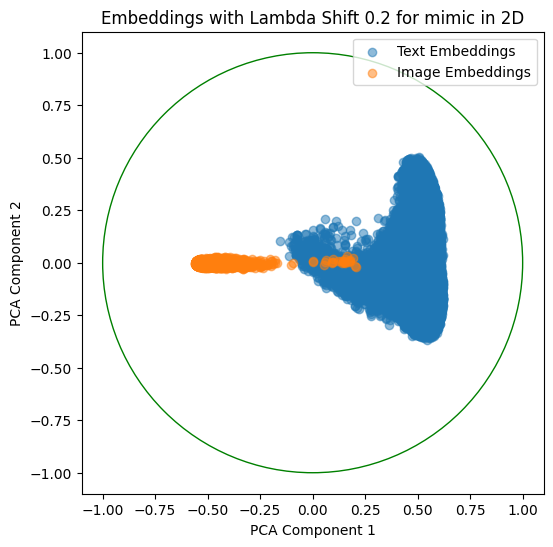

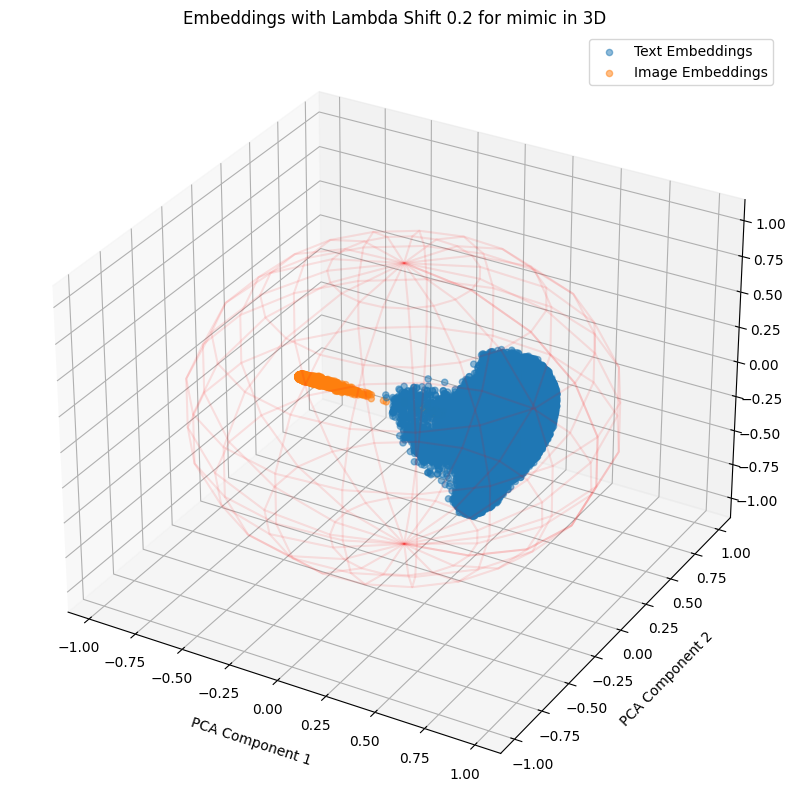

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 25.44 seconds
Total Training Time per Epoch: 1272.16 seconds
Average Inference Time per Epoch: 3.47 seconds
Total Inference Time per Epoch: 173.31 seconds


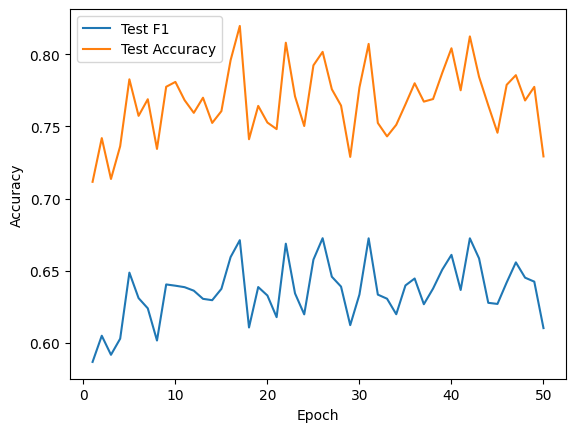

Best Accuracy: {'Acc': 0.819532279314888, 'F1': 0.6711939617043339, 'Epoch': 17}
Best Macro-F1: {'Acc': 0.8015810276679842, 'F1': 0.672566951658129, 'Epoch': 26}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.70 seconds
Total Training Time per Epoch: 935.15 seconds
Average Inference Time per Epoch: 3.39 seconds
Total Inference Time per Epoch: 169.30 seconds


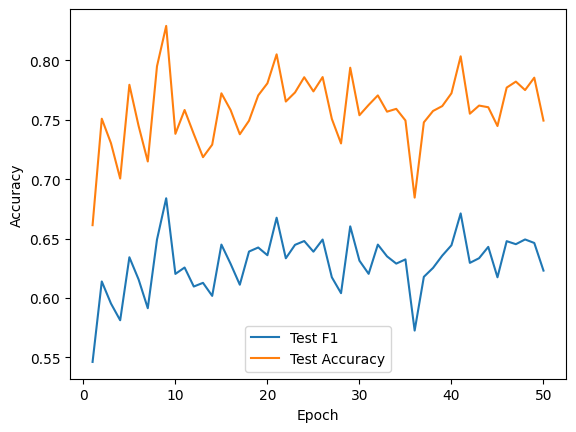

Best Accuracy: {'Acc': 0.8289855072463768, 'F1': 0.683950526897966, 'Epoch': 9}
Best Macro-F1: {'Acc': 0.8289855072463768, 'F1': 0.683950526897966, 'Epoch': 9}
##################################################  Shift 0.4  ##################################################


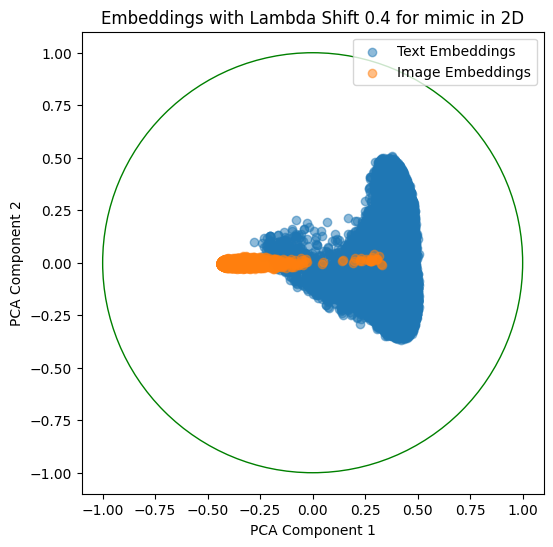

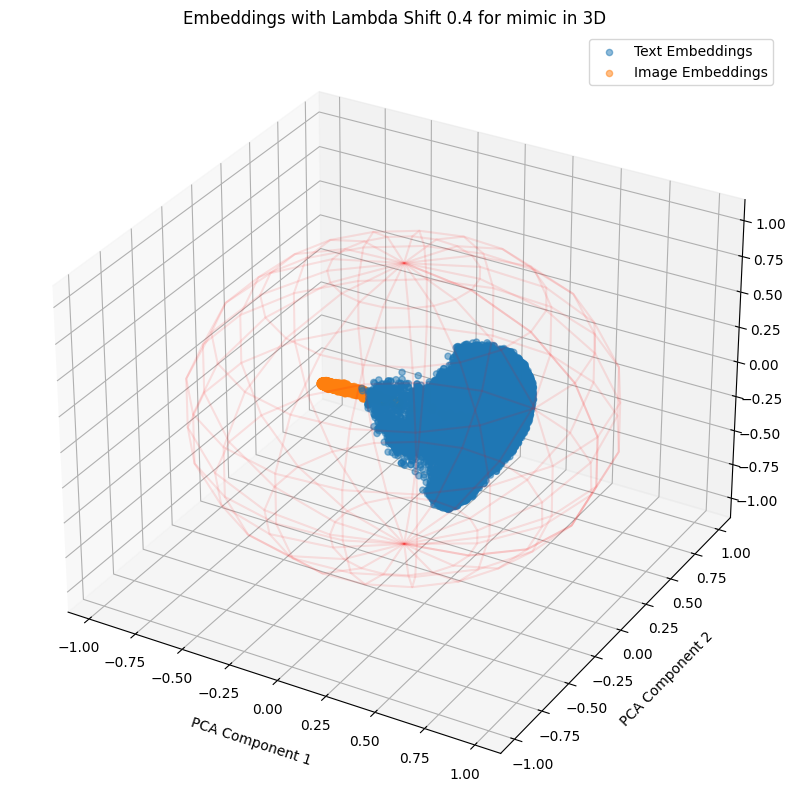

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 24.93 seconds
Total Training Time per Epoch: 1246.37 seconds
Average Inference Time per Epoch: 3.37 seconds
Total Inference Time per Epoch: 168.51 seconds


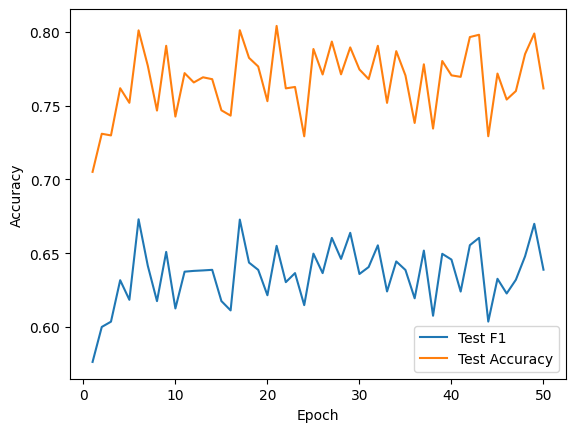

Best Accuracy: {'Acc': 0.8040184453227931, 'F1': 0.6549790567387989, 'Epoch': 21}
Best Macro-F1: {'Acc': 0.8010210803689064, 'F1': 0.6729471228092094, 'Epoch': 6}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.12 seconds
Total Training Time per Epoch: 905.76 seconds
Average Inference Time per Epoch: 3.34 seconds
Total Inference Time per Epoch: 166.84 seconds


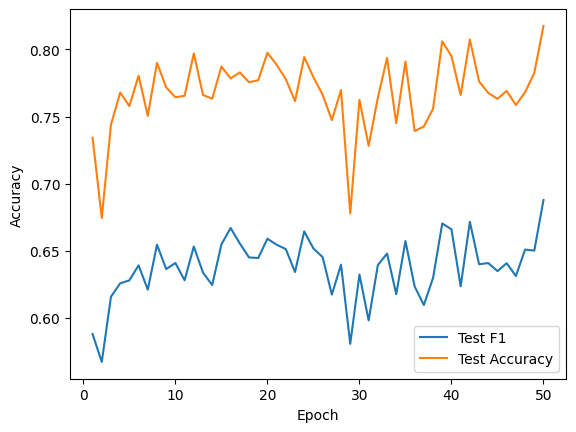

Best Accuracy: {'Acc': 0.8175559947299078, 'F1': 0.6878710545069378, 'Epoch': 50}
Best Macro-F1: {'Acc': 0.8175559947299078, 'F1': 0.6878710545069378, 'Epoch': 50}
##################################################  Shift 0.6  ##################################################


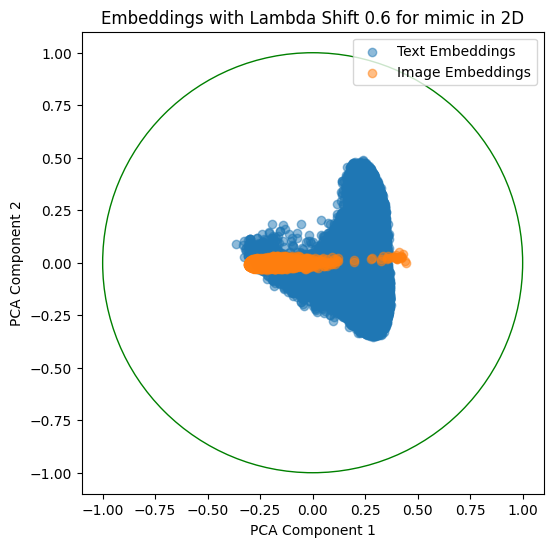

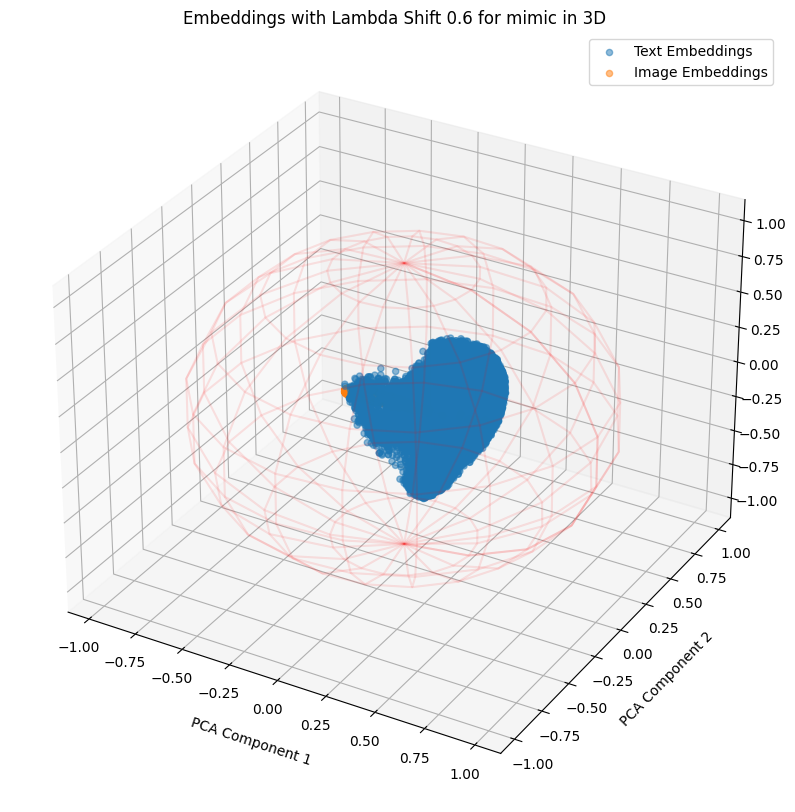

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 22.99 seconds
Total Training Time per Epoch: 1149.50 seconds
Average Inference Time per Epoch: 3.69 seconds
Total Inference Time per Epoch: 184.30 seconds


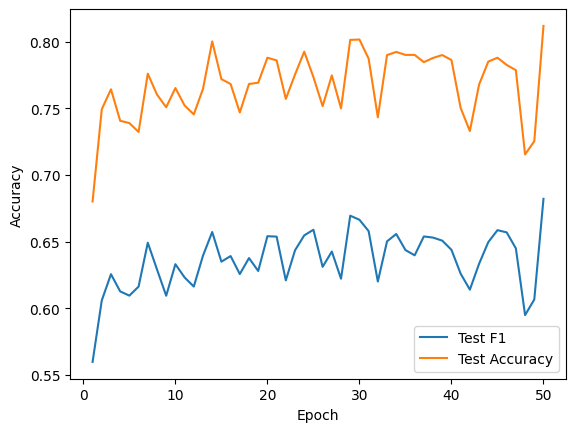

Best Accuracy: {'Acc': 0.8118906455862978, 'F1': 0.6820551187386904, 'Epoch': 50}
Best Macro-F1: {'Acc': 0.8118906455862978, 'F1': 0.6820551187386904, 'Epoch': 50}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.78 seconds
Total Training Time per Epoch: 938.77 seconds
Average Inference Time per Epoch: 3.39 seconds
Total Inference Time per Epoch: 169.60 seconds


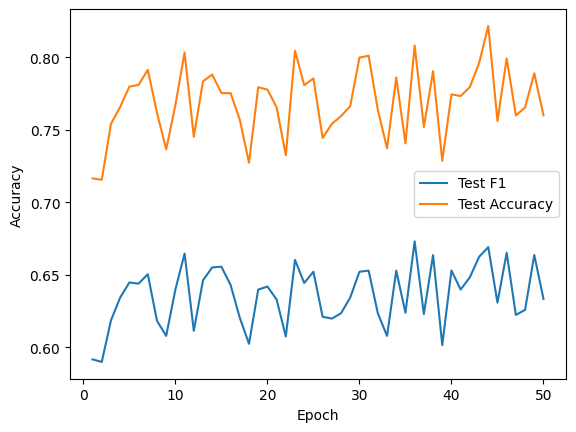

Best Accuracy: {'Acc': 0.8216732542819499, 'F1': 0.6691075721474852, 'Epoch': 44}
Best Macro-F1: {'Acc': 0.8081357048748353, 'F1': 0.673076836204132, 'Epoch': 36}
##################################################  Shift 0.8  ##################################################


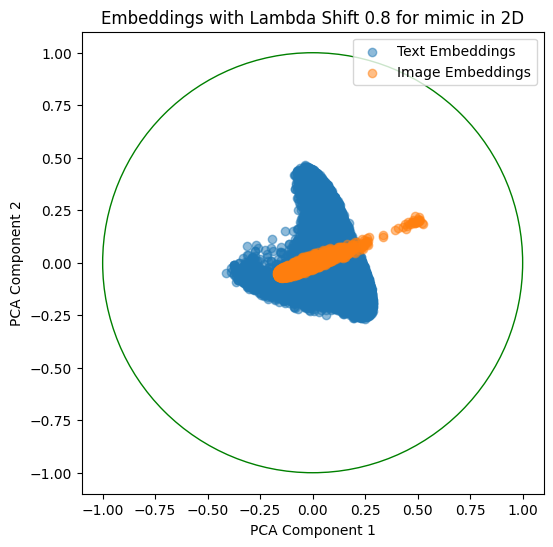

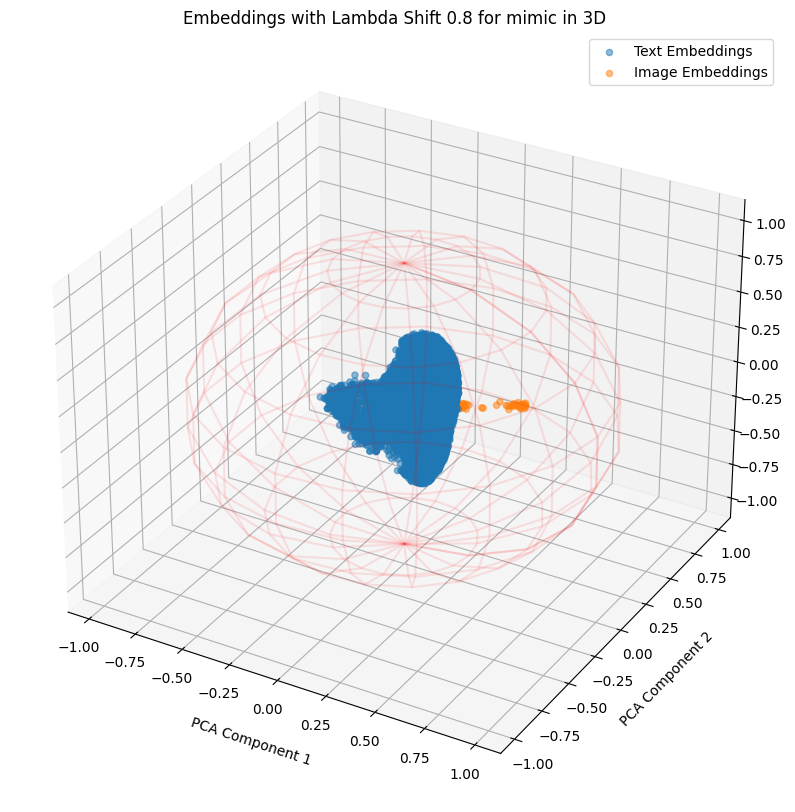

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 22.90 seconds
Total Training Time per Epoch: 1145.04 seconds
Average Inference Time per Epoch: 4.38 seconds
Total Inference Time per Epoch: 218.94 seconds


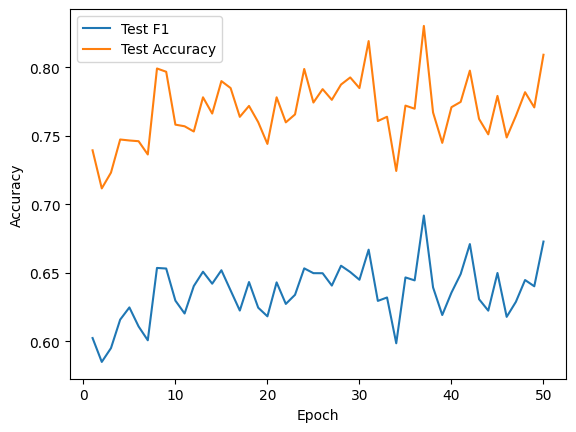

Best Accuracy: {'Acc': 0.8301383399209487, 'F1': 0.6917151898708078, 'Epoch': 37}
Best Macro-F1: {'Acc': 0.8301383399209487, 'F1': 0.6917151898708078, 'Epoch': 37}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 19.69 seconds
Total Training Time per Epoch: 984.65 seconds
Average Inference Time per Epoch: 3.54 seconds
Total Inference Time per Epoch: 177.04 seconds


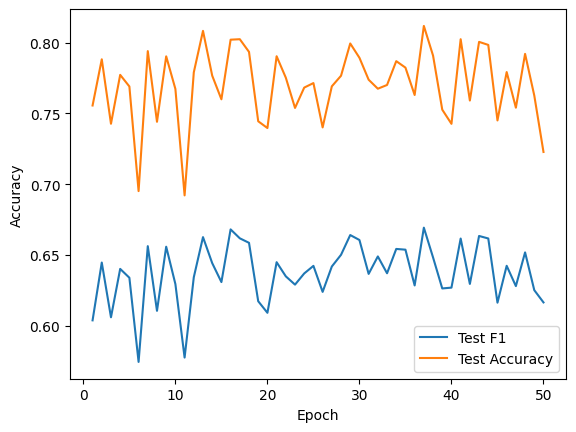

Best Accuracy: {'Acc': 0.8117918313570488, 'F1': 0.6693480997269847, 'Epoch': 37}
Best Macro-F1: {'Acc': 0.8117918313570488, 'F1': 0.6693480997269847, 'Epoch': 37}
##################################################  Shift 1  ##################################################


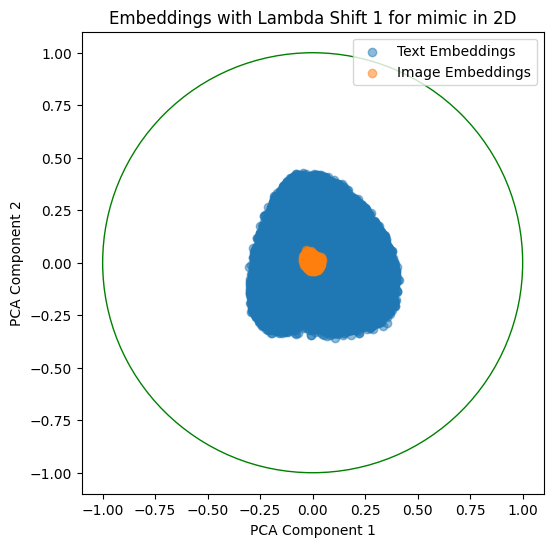

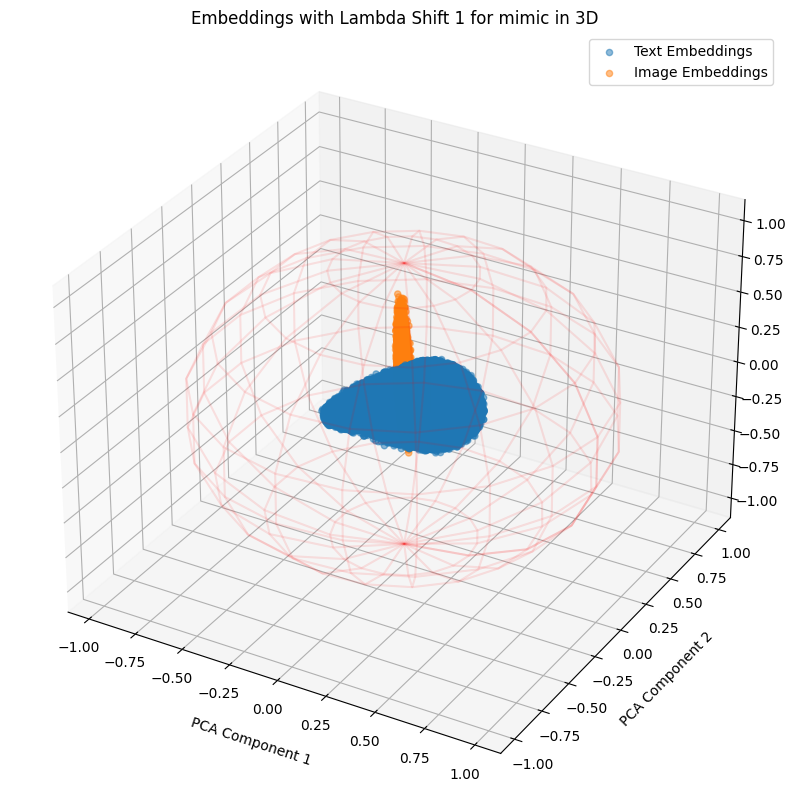

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 25.34 seconds
Total Training Time per Epoch: 1266.80 seconds
Average Inference Time per Epoch: 3.38 seconds
Total Inference Time per Epoch: 169.00 seconds


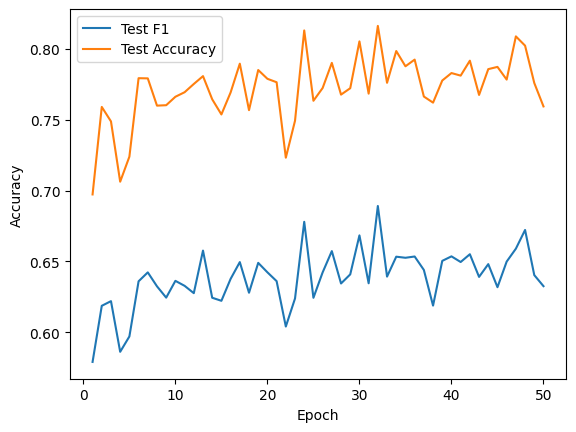

Best Accuracy: {'Acc': 0.8162384716732543, 'F1': 0.6891422649861207, 'Epoch': 32}
Best Macro-F1: {'Acc': 0.8162384716732543, 'F1': 0.6891422649861207, 'Epoch': 32}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 19.04 seconds
Total Training Time per Epoch: 952.02 seconds
Average Inference Time per Epoch: 3.43 seconds
Total Inference Time per Epoch: 171.64 seconds


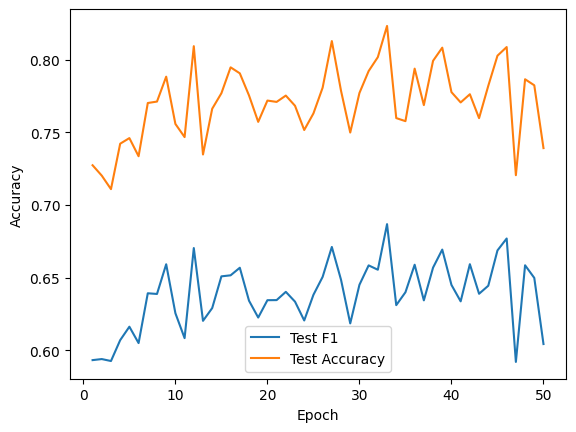

Best Accuracy: {'Acc': 0.8232542819499341, 'F1': 0.6868830296846922, 'Epoch': 33}
Best Macro-F1: {'Acc': 0.8232542819499341, 'F1': 0.6868830296846922, 'Epoch': 33}


In [6]:
# Assuming df is your DataFrame
#lambda_shift_values = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Negative values bring embeddings closer, positive values push them apart
lambda_shift_values = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]  # Negative values bring embeddings closer, positive values push them apart

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update column names based on the new dimensions
    if text_embeddings.shape[1] < text_embeddings_shifted.shape[1]:
        text_columns_updated = update_column_names(text_columns, text_embeddings_shifted.shape[1])
    else: 
        text_columns_updated = text_columns
        
    if image_embeddings.shape[1] < image_embeddings_shifted.shape[1]: 
        image_columns_updated = update_column_names(image_columns, image_embeddings_shifted.shape[1])
    else:
        image_columns_updated = image_columns
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns_updated] = text_embeddings_shifted
    df_shifted[image_columns_updated] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:
    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"late_({lambda_shift})"] = best

In [7]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")

Results Early Fusion: 
Shift = -1
Best Accuracy: {'Acc': 0.8165349143610013, 'F1': 0.6760405451038326, 'Epoch': 32}
Best F1: {'Acc': 0.8165349143610013, 'F1': 0.6760405451038326, 'Epoch': 32}
Shift = -0.8
Best Accuracy: {'Acc': 0.8167325428194994, 'F1': 0.6792757095049626, 'Epoch': 50}
Best F1: {'Acc': 0.8167325428194994, 'F1': 0.6792757095049626, 'Epoch': 50}
Shift = -0.6
Best Accuracy: {'Acc': 0.8099802371541502, 'F1': 0.6634927173200527, 'Epoch': 13}
Best F1: {'Acc': 0.8032608695652174, 'F1': 0.6765161184013286, 'Epoch': 30}
Shift = -0.4
Best Accuracy: {'Acc': 0.822068511198946, 'F1': 0.6892360378454094, 'Epoch': 36}
Best F1: {'Acc': 0.822068511198946, 'F1': 0.6892360378454094, 'Epoch': 36}
Shift = -0.2
Best Accuracy: {'Acc': 0.8069499341238472, 'F1': 0.6620199672780047, 'Epoch': 26}
Best F1: {'Acc': 0.7957509881422925, 'F1': 0.666288197511734, 'Epoch': 27}
Shift = 0
Best Accuracy: {'Acc': 0.8074440052700922, 'F1': 0.6720911616758947, 'Epoch': 44}
Best F1: {'Acc': 0.8074440052700922

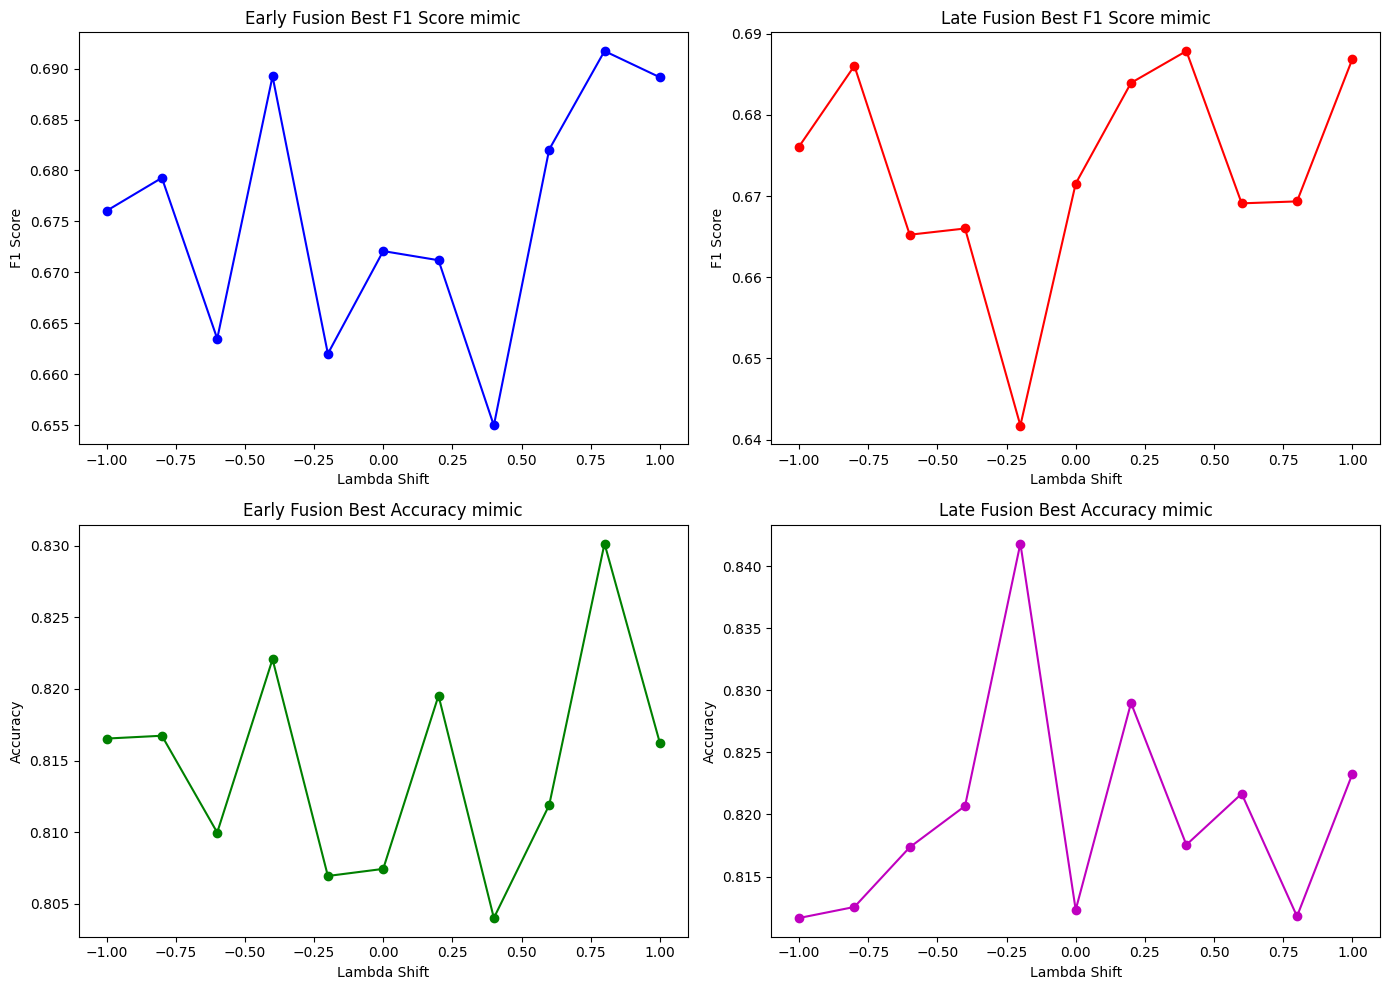

In [8]:
plot_results(results, lambda_shift_values, DATASET)